# Assembling data for the Hyades

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from tqdm import tqdm

plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [2]:
def convert_hours_to_degrees(df, ra_name, dec_name):
    """
    Returns the dataframe, df, with additional columns "ra" and "dec".
    """
    RA, DE = [], [] #[np.zeros(len(douglas)) for i in range(2)]
    for i in range(len(df)):     
        coords = "{0} {1}".format(df[ra_name].values[i], df[dec_name].values[i])
        c = SkyCoord(coords, unit=(u.hourangle, u.deg))
        RA.append(c.ra.degree)
        DE.append(c.dec.degree)
    df["ra"] = RA
    df["dec"] = DE
    return df

# Douglas rotation periods

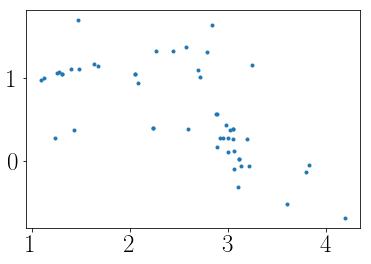

In [24]:
douglas = pd.read_csv("../data/hyades.csv")
m = 0 < douglas.prot.values
plt.plot(douglas.bp[m] - douglas.rp[m], np.log10(douglas.prot[m]), ".")

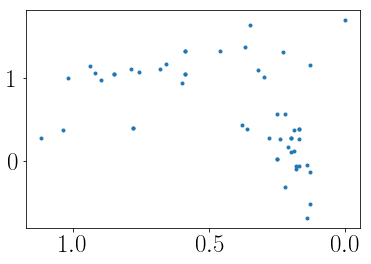

In [25]:
mass = []
for i, ma in enumerate(douglas.Mass.values):
    try:
        mass.append(float(ma))
    except:
        mass.append(0.)
douglas["mass"] = np.array(mass)
plt.plot(douglas.mass.values[m], np.log10(douglas.prot.values[m]), ".")
plt.gca().invert_xaxis()

Combine Douglas, Delorme and Radick (still need to add Hartman, Prosser and ASAS).

# Delorme

In [5]:
# de = pd.read_csv("../data/hyades_delorme.csv", skiprows=70)
# delorme = pd.DataFrame(dict({
#                              "prot": de.Per,
#                              "J-Ks": de["J-Ks"],
#                              "Ks": de.Ksmag,
#                              "vmag": de.Vmag,
#                              "B-V": de["B-Vl"],
#                              "ra": de._RA,
#                              "dec": de._DE
#                               }))

In [6]:
# radick87= pd.read_csv("../data/hyades_radick_1987.csv")
# radick95= pd.read_csv("../data/hyades_radick_1995.csv")

# Hartman

In [26]:
# ha = pd.read_csv("../data/hartman.csv", skiprows=76)
# period = []
# for p in ha.Pe.values:
#     if p == "          ":
#         period.append(0.)
#     else:
#         period.append(float(p))
# ha = convert_hours_to_degrees(ha, "RAJ2000", "DEJ2000")
# hartman = pd.DataFrame(dict({"ra": ha.ra, "dec": ha.dec,
#                              "jmag": ha.Jmag,
#                              "kmag": ha.Kmag,
#                              "hmag": ha.Hmag,
#                              "vmag": ha.Vmag,
#                              "prot": np.array(period)
# }))

In [27]:
# from astropy.coordinates import FK5

# RAJ2000, DEJ2000 = [], []
# for i in range(len(radick87)):
#     coord = SkyCoord(radick87.RAJ1950.values[i], radick87.decJ1950.values[i], 
#                      unit=(u.hourangle, u.deg), equinox="J1950")
#     rd = coord.transform_to(FK5(equinox='J2000'))
#     RAJ2000.append(rd.ra.degree)
#     DEJ2000.append(rd.dec.degree)

# radick87["RAJ2000"] = np.array(RAJ2000)
# radick87["DEJ2000"] = np.array(DEJ2000)

Load the gaia crossmatch for the clusters.

In [28]:
gaia = pd.read_csv("../data/gaia_cluster_crossmatch.csv", skiprows=49)
m = gaia.Cluster.values == "Hyades  "
hg = gaia.iloc[m]
hg.head()
hg["source_id"] = hg.Source

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


And Megan Bedell's K2 - Gaia crossmatch.

In [29]:
bedell = pd.read_csv("K2_c4_gaia.csv")

(-1, 36)

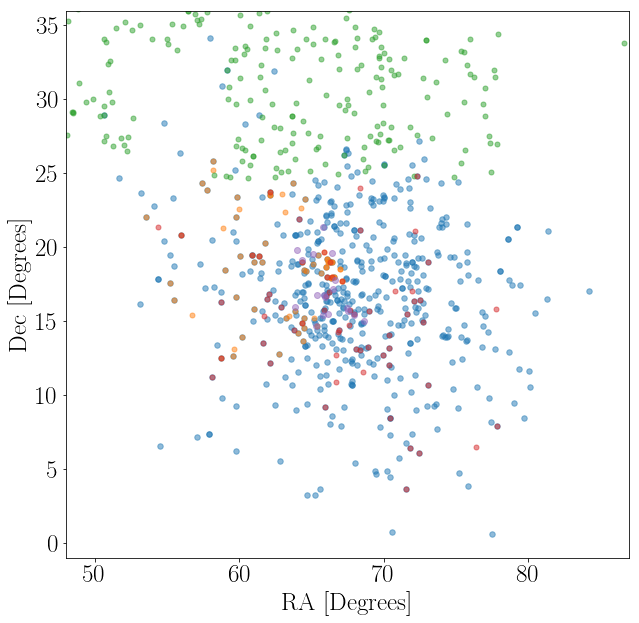

In [30]:
f = .3
width, height = (max(hg.RA_ICRS) - min(hg.RA_ICRS)), (max(hg.DE_ICRS) - min(hg.DE_ICRS))
plt.figure(figsize=(width*f, height*f))
plt.scatter(hg.RA_ICRS, hg.DE_ICRS, s=30, zorder=0, alpha=.5)
plt.scatter(douglas.ra, douglas.dec, s=25, zorder=1, alpha=.5)
plt.scatter(hartman.ra, hartman.dec, s=25, zorder=2, alpha=.5)
plt.scatter(delorme.ra, delorme.dec, s=25, zorder=3, alpha=.5)
plt.scatter(radick87.RAJ2000, radick87.DEJ2000, zorder=4, alpha=.5)
plt.xlabel("$\mathrm{RA~[Degrees]}$")
plt.ylabel("$\mathrm{Dec~[Degrees]}$")
plt.xlim(48, 87)
plt.ylim(-1, 36)

Find closest matches between Gaia and other catalogues.

In [17]:
# def find_min_dist(ra1, dec1, ra2, dec2, dist_arcsecs=5.):
#     """
#     ind1 is a list of indices the same length as ra1 and dec1 that identifies matching stars in ra1 and dec1.
#     ind2 is a list of indices the same length as ra2 and dec2 that identifies matching stars in ra2 and dec2.
#     """
#     id1, id2 = np.ones((len(ra1)))*np.nan, np.ones((len(ra2)))*np.nan
#     closest_ra, closest_dec, distance, ind1, ind2 = [], [], [], [], []
#     for i in tqdm(range(len(ra1))):
#         e2 = np.sqrt((ra2.values - ra1.values[i])**2 + (dec2.values - dec1.values[i])**2)
#         min_distance = min(e2)
#         if min_distance < dist_arcsecs/3600.:
#             m = e2 == min_distance
#             if sum(m) > 1:
#                 m = np.arange(len(ra2))[m[0]]
#             closest_ra.append(ra1.values[i])
#             closest_dec.append(dec1.values[i])
#             distance.append(min_distance)
#             if not np.arange(len(ra2))[m] in np.array(ind2):
#                 ind1.append(i)
#                 ind2.append(np.arange(len(ra2))[m])
#                 id1[i] = i
#                 id2[m] = i
    
#     m1, m2 = np.zeros(len(ra1), dtype="bool"), np.zeros(len(ra2), dtype="bool")
#     for i in ind1:
#         m1[i] = True
#     for i in ind2:
#         m2[i] = True
#     return m1, m2, id1, id2

def find_min_dist(ra1, dec1, ra2, dec2, dist_arcsecs=5.):
    """
    ind1 is a list of indices the same length as ra1 and dec1 that identifies matching stars in ra1 and dec1.
    ind2 is a list of indices the same length as ra2 and dec2 that identifies matching stars in ra2 and dec2.
    """
    id1, id2 = np.ones((len(ra1)))*np.nan, np.ones((len(ra2)))*np.nan
    ind1, ind2 = [], []
    for i in tqdm(range(len(ra1))):
        e2 = np.sqrt((ra2.values - ra1.values[i])**2 + (dec2.values - dec1.values[i])**2)
        min_distance = min(e2)
        if min_distance < dist_arcsecs/3600.:
            m = e2 == min_distance
            if sum(m) > 1:  # If there is a star (a) within 5 arcsecs of this target star (i)
                m = np.arange(len(ra2))[m[0]]  # create an index mask, selecting the position of star a
            if not np.arange(len(ra2))[m] in np.array(ind2):  # If this star has not already been identified
                ind1.append(i)  # add i to the list of inds1
                ind2.append(np.arange(len(ra2))[m])  # Add a to the list of inds2
                id1[i] = i
                id2[m] = i
    
    m1, m2 = np.zeros(len(ra1), dtype="bool"), np.zeros(len(ra2), dtype="bool")
    for i in ind1:
        m1[i] = True
    for i in ind2:
        m2[i] = True
    return m1, m2, id1, id2

# Gaia and Hartman

Hartman has J, H and K colors, V-band magnitudes, and the rotation period column is "Pe".

(-1, 36)

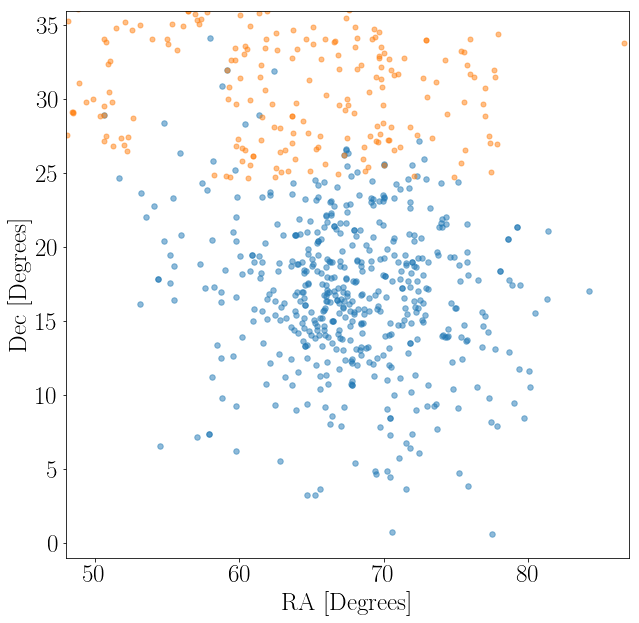

In [18]:
f = .3
width, height = (max(hg.RA_ICRS) - min(hg.RA_ICRS)), (max(hg.DE_ICRS) - min(hg.DE_ICRS))
plt.figure(figsize=(width*f, height*f))
plt.scatter(hg.RA_ICRS, hg.DE_ICRS, s=30, zorder=0, alpha=.5)
plt.scatter(hartman.ra, hartman.dec, s=25, zorder=1, alpha=.5)
plt.xlabel("$\mathrm{RA~[Degrees]}$")
plt.ylabel("$\mathrm{Dec~[Degrees]}$")
plt.xlim(48, 87)
plt.ylim(-1, 36)

Find the closest stars

In [19]:
_, _, ind1, ind2 = find_min_dist(hg.RA_ICRS, hg.DE_ICRS, hartman.ra, hartman.dec)
print(sum(ind1), sum(ind2), "matches")

100%|██████████| 515/515 [00:00<00:00, 3192.51it/s]

nan nan matches


IndexError: arrays used as indices must be of integer (or boolean) type

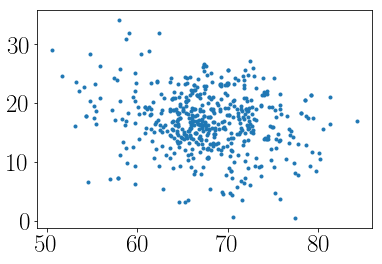

In [20]:
plt.plot(hg.RA_ICRS, hg.DE_ICRS, ".")
plt.plot(hg.RA_ICRS.values[ind1], hg.DE_ICRS.values[ind1], ".", alpha=.5)
plt.xlabel("RA")
plt.ylabel("dec")

Now add the Hartman catalogue on to the Douglas catalogue.

In [21]:
hg.iloc[ind1]

IndexError: positional indexers are out-of-bounds

In [121]:
hartman.iloc[ind2]

,dec,hmag,jmag,kmag,prot,ra,vmag
1566,28.974778,10.195,10.823,9.939,1.925813,50.631917,15.175
1581,31.956889,9.188,9.795,8.944,0.000000,59.137833,14.122
1885,25.592417,7.583,8.168,7.385,5.620124,70.038375,10.626
1886,26.246806,9.038,9.680,8.827,18.316511,67.295708,12.889


In [122]:
hart_gaia = hartman.iloc[ind2]
hart_gaia["source_id"] = hg.iloc[ind1].source_id.values

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
df1 = pd.merge(douglas, hart_gaia, how="outer")
df1.prot
print(np.shape(douglas), np.shape(hart_gaia), np.shape(df1))

NameError: name 'hart_gaia' is not defined

In [23]:
plt.figure(figsize=(width*f, height*f))
plt.scatter(df1.iloc[:73].ra, df1.iloc[:73].dec, s=30, zorder=0, label="Douglas")
plt.scatter(df1.iloc[73:].ra, df1.iloc[73:].dec, s=30, zorder=1, label="Hartman")
plt.xlabel("$\mathrm{RA~[Degrees]}$")
plt.ylabel("$\mathrm{Dec~[Degrees]}$")
plt.xlim(48, 87)
plt.ylim(-1, 36)
plt.legend()

NameError: name 'df1' is not defined

# Gaia and Delorme

Delorme has J-Ks colour, V-band magnitudes and the Period column is called "Per".

In [125]:
delorme.head()

,B-V,J-Ks,Ks,dec,prot,ra,vmag
0,0.92,0.524,7.12,21.34317,10.57,54.39571,9.30
1,0.90,0.871,9.61,20.86011,12.30,55.94612,
2,1.54,0.858,9.01,11.26072,13.29,58.14296,
3,1.58,0.905,9.06,16.31564,6.04,58.72167,
4,1.07,0.607,7.57,12.48558,11.66,58.75596,10.00


(-1, 36)

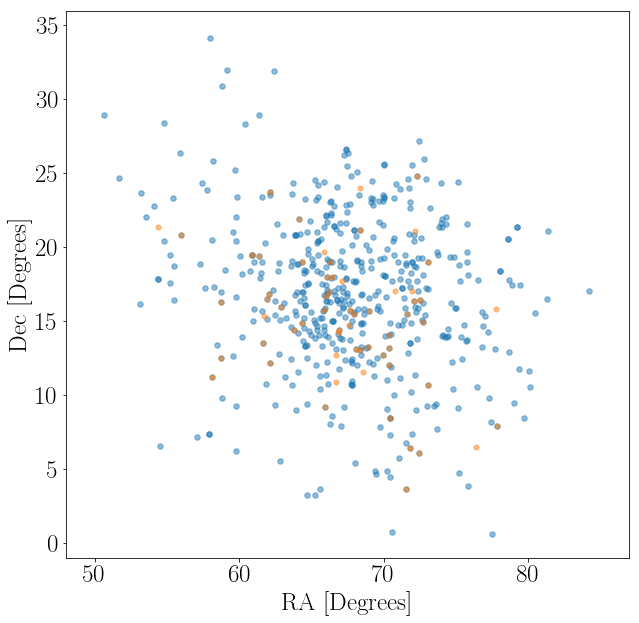

In [126]:
f = .3
width, height = (max(hg.RA_ICRS) - min(hg.RA_ICRS)), (max(hg.DE_ICRS) - min(hg.DE_ICRS))
plt.figure(figsize=(width*f, height*f))
plt.scatter(hg.RA_ICRS, hg.DE_ICRS, s=30, zorder=0, alpha=.5)
plt.scatter(delorme.ra, delorme.dec, s=25, zorder=1, alpha=.5)
plt.xlabel("$\mathrm{RA~[Degrees]}$")
plt.ylabel("$\mathrm{Dec~[Degrees]}$")
plt.xlim(48, 87)
plt.ylim(-1, 36)

Find the closest stars.

In [127]:
ind1, ind2 = find_min_dist(hg.RA_ICRS, hg.DE_ICRS, delorme.ra, delorme.dec)
print(sum(ind1), sum(ind2), "matches")

100%|██████████| 515/515 [00:00<00:00, 19454.45it/s]

45 45 matches


Text(0,0.5,'dec')

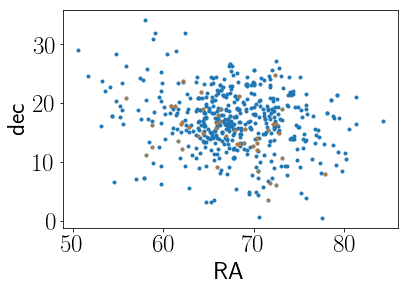

In [128]:
plt.plot(hg.RA_ICRS, hg.DE_ICRS, ".")
plt.plot(hg.RA_ICRS.values[ind1], hg.DE_ICRS.values[ind1], ".", alpha=.5)
plt.xlabel("RA")
plt.ylabel("dec")

Add Delorme to the catalogue.

In [129]:
de_gaia = delorme.iloc[ind2]

In [130]:
de_gaia["source_id"] = hg.iloc[ind1].source_id.values

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [131]:
df2 = pd.merge(df1, de_gaia, how="outer")
print(np.shape(df1), np.shape(de_gaia), np.shape(df2))

(77, 42) (45, 8) (122, 45)


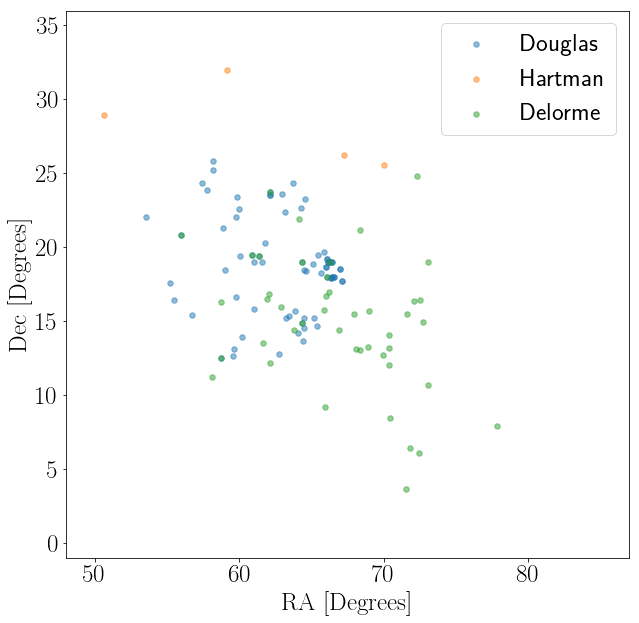

In [132]:
plt.figure(figsize=(width*f, height*f))
plt.scatter(df2.iloc[:73].ra, df2.iloc[:73].dec, s=30, zorder=0, alpha=.5, label="Douglas")
plt.scatter(df2.iloc[73:77].ra, df2.iloc[73:77].dec, s=30, zorder=1, alpha=.5, label="Hartman")
plt.scatter(df2.iloc[77:124].ra, df2.iloc[77:124].dec, s=30, zorder=2, alpha=.5, label="Delorme")
plt.xlabel("$\mathrm{RA~[Degrees]}$")
plt.ylabel("$\mathrm{Dec~[Degrees]}$")
plt.xlim(48, 87)
plt.ylim(-1, 36)
plt.legend()

In [133]:
df2.head()

,Unnamed: 0,[RSP2011],HIP,RAJ2000,DEJ2000,2MASS,EPIC,Kpmag,Mass,Bin,...,source_id,prot,mass,hmag,jmag,kmag,vmag,B-V,J-Ks,Ks
0,0.0,64,,03 34 10.5,+22 04 21.2,03341053+2204213,210942999.0,13.68,0.17,2.0,...,64552022725337856,1.8088,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,,,03 40 45.8,+17 34 47.7,03404581+1734477,210643507.0,16.64,0.13,0.0,...,44388010264995200,0.0000,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,75,,03 42 04.4,+16 25 18.3,03420441+1625183,210563410.0,15.13,0.18,0.0,...,44052178182130816,0.0000,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,78,,03 43 47.0,+20 51 36.4,03434706+2051363,210865372.0,13.38,0.32,0.0,...,63395989328447232,12.3168,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,80,,03 46 59.5,+15 24 16.8,03465952+1524170,210499476.0,14.16,0.18,2.0,...,42947680095257344,0.8584,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# for i, p in enumerate(df2.prot.values):
#     print(type(p), i)
print(df2.prot.values[74])

0.0


100 122


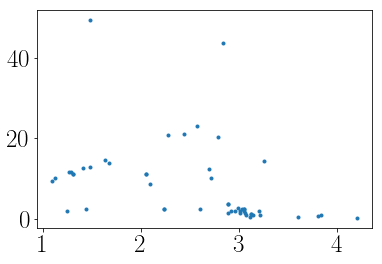

In [135]:
m = df2.prot.values > 0.
plt.plot(df2.bp.values[m] - df2.rp.values[m], df2.prot.values[m], ".")
print(len(df2.prot.values[m]), len(df2))

In [136]:
# print(df2.source_id.values)
source_ids_hyades = pd.DataFrame(dict({"source_id": df2.source_id}))
source_ids_hyades.to_csv("../data/source_ids_hyades.csv")

Log in here: https://gea.esac.esa.int/archive/

After performing the following query with the above data file uploaded:

SELECT *

FROM user_table_name

JOIN gaiadr2.gaia_source AS gaia USING (source_id)

In [137]:
gaia_h = pd.read_csv("../data/hyades-result.csv")
gaia_h.head()

,table2_oid,col1,solution_id,designation,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,source_id
0,1,0,1635721458409799680,Gaia DR2 64552022725337856,805628475,2015.5,53.544861,0.084542,22.072399,0.062352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,64552022725337856
1,2,1,1635721458409799680,Gaia DR2 44388010264995200,350324408,2015.5,55.191643,0.114236,17.579829,0.088322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,44388010264995200
2,3,2,1635721458409799680,Gaia DR2 44052178182130816,120803872,2015.5,55.519163,0.088386,16.421655,0.059111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,44052178182130816
3,4,3,1635721458409799680,Gaia DR2 63395989328447232,378490312,2015.5,55.946823,0.056599,20.859947,0.038860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,63395989328447232
4,5,4,1635721458409799680,Gaia DR2 42947680095257344,283438101,2015.5,56.749149,0.143451,15.404583,0.082477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,42947680095257344


In [182]:
df3 = pd.merge(df2, gaia_h, on="source_id", suffixes=["", "_gaia"])

In [183]:
print(np.shape(df3))

(162, 142)


/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


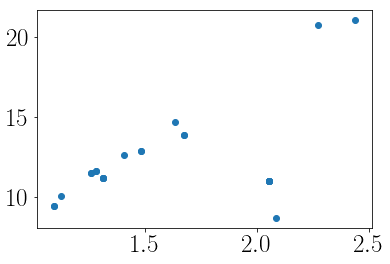

In [184]:
m = 0 < df3.prot.values 
m &= 30 < df3.radial_velocity.values
plt.scatter(df3.bp[m] - df3.rp[m], df3.prot.values[m])

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


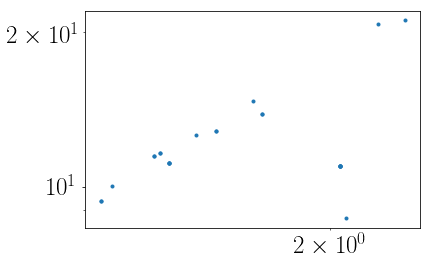

In [185]:
plt.loglog(df3.bp[m] - df3.rp[m], df3.prot.values[m], ".")

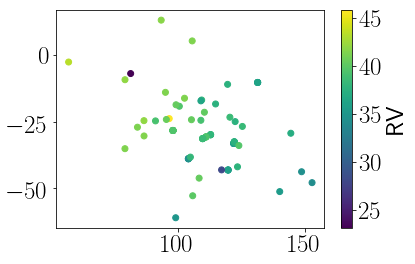

In [186]:
plt.scatter(df3.pmra.values, df3.pmdec.values, c=df3.radial_velocity.values);
plt.colorbar(label="RV")

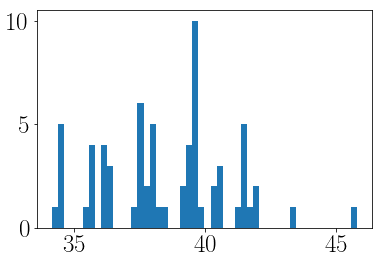

In [187]:
rv = df3.radial_velocity.values[m][np.isfinite(df3.radial_velocity.values[m])]
plt.hist(rv, 50);

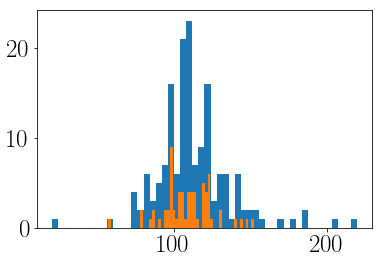

In [188]:
plt.hist(df3.pmra, 50);
plt.hist(df3.pmra[m], 50);

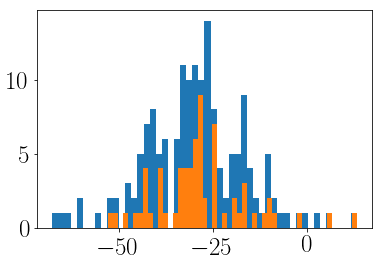

In [189]:
plt.hist(df3.pmdec, 50);
plt.hist(df3.pmdec[m], 50);

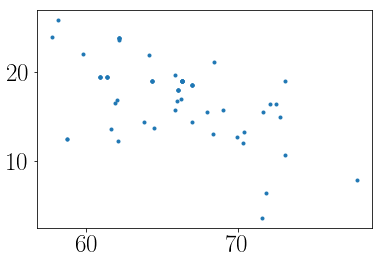

In [191]:
plt.plot(df3.ra_gaia.values[m], df3.dec_gaia.values[m], ".")

Load Brewer catalog

In [198]:
brewer = pd.read_csv("../data/brewer.csv")
convert_hours_to_degrees(brewer, "ra", "dec");

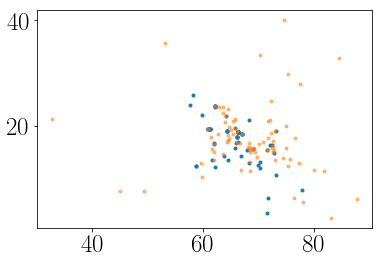

In [200]:
plt.plot(df3.ra_gaia.values[m], df3.dec_gaia.values[m], ".")
plt.plot(brewer.ra, brewer.dec, ".", alpha=.5)

In [203]:
inds1, inds2 = find_min_dist(df3.ra_gaia, df3.dec_gaia, 
                             brewer.ra, brewer.dec, dist_arcsecs=5.)

100%|██████████| 162/162 [00:00<00:00, 20343.63it/s]


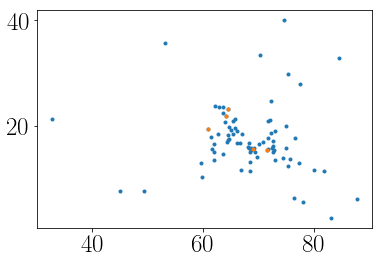

In [205]:
plt.plot(brewer.ra.values, brewer.dec.values, ".")
plt.plot(df3.ra_gaia.values[inds1], df3.dec_gaia.values[inds1], ".")
teff, logg = [np.zeros(len(df3)) for i in range(2)]
teff[inds1] = brewer.teff.values[inds2]
logg[inds1] = brewer.logg.values[inds2]
df3["teff"] = teff
df3["logg"] = logg

In [206]:
df3.to_csv("../data/hyades_compilation.csv")

In [207]:
df = pd.read_csv("../data/hyades_compilation.csv")

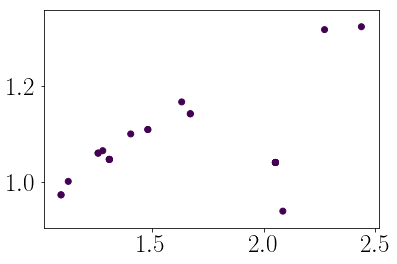

In [225]:
m = df.prot > 0.
m &= df.radial_velocity > 30.
plt.scatter(df.bp[m] - df.rp[m], np.log10(df.prot[m]), c=df.teff[m])

In [270]:
bp_rp = df.bp.values[m] - df.rp.values[m]
prot = df.prot.values[m]
n = np.isfinite(bp_rp)
x1 = np.log(bp_rp[n])
y1 = np.log(prot[n])
mm = x1 > .6
mm &= y1 < 2.5
x, y = x1[~mm], y1[~mm]

In [271]:
AT = np.vstack((np.ones(len(x)), x, x**2))
ATA = np.dot(AT, AT.T)
a, b, c = np.linalg.solve(ATA, np.dot(AT, y))
print(a, b, c)

2.1860663916214027 0.9041761786288186 0.0925341367715558


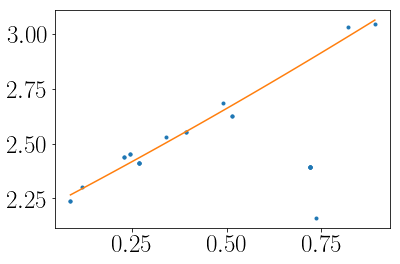

In [273]:
plt.plot(x1, y1, ".")
xs = np.linspace(min(x), max(x), 100)
plt.plot(xs, a + b*xs + c*xs**2)